In [180]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.model_selection import train_test_split

## Load the Dataset

In [2]:
df=pd.read_csv('Downloads/Creditcard_data.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,575,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,-0.274447,...,-0.143508,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,26.72,0
768,579,-1.296845,-0.511605,2.404726,-0.310762,-0.319551,-0.542842,-0.173310,0.260423,-1.202688,...,-0.071270,-0.161175,0.088496,0.285390,0.281069,-0.370130,0.043410,0.092318,80.00,0
769,579,1.214170,0.210481,0.484651,0.479768,-0.261955,-0.527039,0.021782,-0.106888,-0.037631,...,-0.224292,-0.594609,0.159877,0.091873,0.140964,0.227406,-0.017389,0.016030,5.98,0
770,580,1.267030,-0.071114,0.037680,0.512683,0.242392,0.705212,-0.226582,0.109483,0.657565,...,-0.164468,-0.177225,-0.222918,-1.245505,0.678360,0.525059,0.002920,-0.003333,12.36,0


In [3]:
df['Class'].value_counts()

0    763
1      9
Name: Class, dtype: int64

In [4]:
class_0=df[df['Class']==0]
class_1=df[df['Class']==1]
class_count_0,class_count_1=df['Class'].value_counts()
class_count_0,class_count_1

(763, 9)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


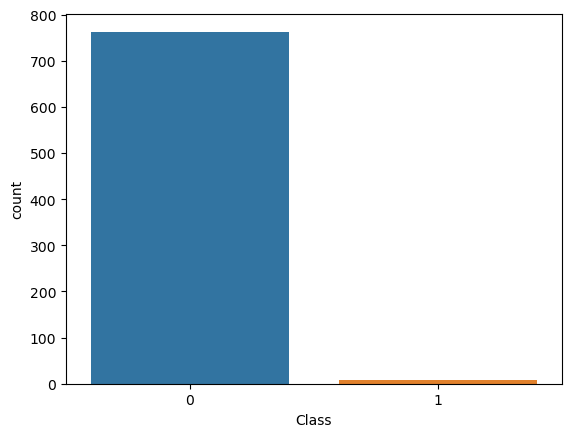

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df['Class'])
plt.show()

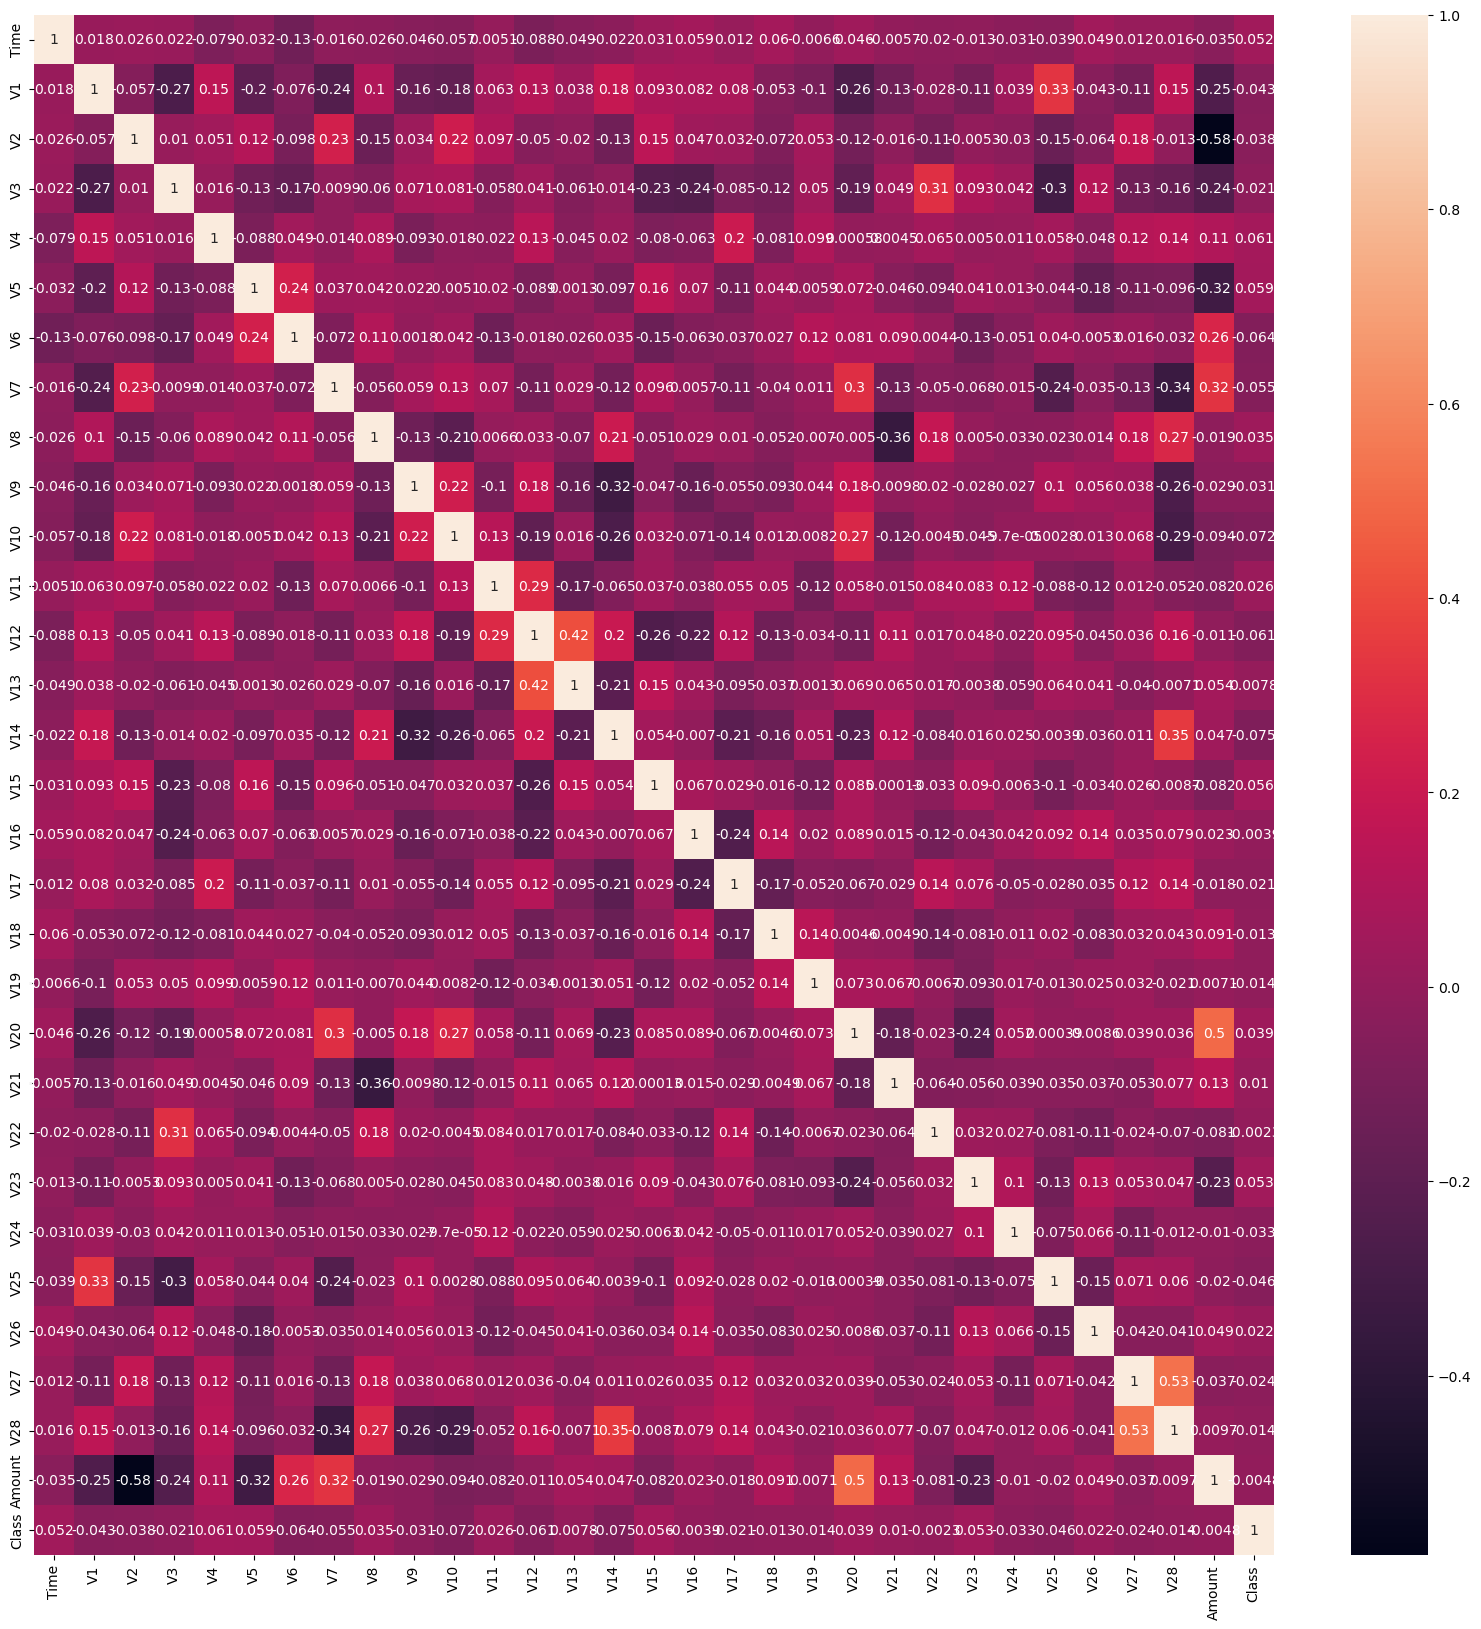

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [2]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

## Balance Dataset using inbuilt imbalance Learn module

## Random Over Sampling

In [183]:
from collections import Counter    #Counter counts hastable objects, it implicitly creates hastable when invoked
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)
x_ros,y_ros=ros.fit_resample(X,Y)
print('Original dataset shape:', Counter(Y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape: Counter({0: 763, 1: 9})
Resample dataset shape Counter({0: 763, 1: 763})


In [184]:
#Creating new Dataframe of x_ros and y_ros
df_ros=x_ros
df_ros['Class']=y_ros
df_ros

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1
1522,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
1523,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
1524,539,-1.738582,0.052740,1.187057,-0.656652,0.920623,-0.291788,0.269083,0.140631,0.023464,...,-0.179545,-0.192036,-0.261879,-0.237477,-0.335040,0.240323,-0.345129,-0.383563,1.00,1


## Simple Random Sampling

In [185]:
np.random.seed(0)
# Sample size in Random Sample: (Z^2*p*(1-p))/E^2
# Z(Confidence Level): 1.96
# p: estimated proportion of population assumed to be 0.5
# E: estmated error

sample_size=int((pow(1.96,2)*0.5*0.5)/(pow(0.05,2)))
print(sample_size)
random_sample = df_ros.sample(n=sample_size, random_state=0)
random_sample

384


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1361,484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,...,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,1.00,1
511,377,1.166919,0.027049,0.513875,0.860965,-0.519452,-0.681147,0.074992,-0.187776,0.345399,...,-0.202750,-0.441391,-0.025782,0.452607,0.467223,0.262577,-0.023834,0.020521,40.83,0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0
393,284,-0.810756,0.654499,2.217257,0.104341,-0.286801,0.117833,0.287552,-0.736461,0.699092,...,0.938194,0.571651,-0.101609,0.363928,-0.170947,-0.471524,0.058958,-0.079157,30.30,0
471,346,1.077079,0.284980,0.007731,1.657073,0.052020,0.446389,-0.407036,0.355704,0.626039,...,-0.174337,-0.174161,-0.153375,-0.466331,0.611001,-0.252871,0.090375,0.054820,10.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69,1
530,394,1.293053,0.457969,-1.940450,0.173149,2.609570,3.014117,-0.269415,0.754420,-0.221009,...,-0.121126,-0.427753,-0.159336,0.857135,0.850055,-0.311685,0.037536,0.050618,1.00,0
1363,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
795,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1


In [186]:
X_random=random_sample.iloc[:,:-1]
Y_random=random_sample.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(X_random,Y_random,train_size=0.7)

#### Applying Logistic Regression

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
ac1=accuracy_score(y_test,y_pred)
ac1

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.896551724137931

#### Applying Extra Gradient Boost Classifier

In [188]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
ac2=accuracy_score(y_test,y_pred)
ac2

0.9827586206896551

#### Applying Random Forest Classifier

In [189]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
ac3=accuracy_score(y_test,y_pred)
ac3

0.9913793103448276

#### Applying Support Vector Classifier

In [190]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
ac4=accuracy_score(y_test,y_pred)
ac4

0.6896551724137931

#### Applying K-Nearest Neighbour

In [191]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()     # by default it takes 5 neighbors
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
ac5=accuracy_score(y_test,y_pred)
ac5

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9482758620689655

In [194]:
m1=pd.Series([ac1,ac2,ac3,ac4,ac5])
m1

0    0.896552
1    0.982759
2    0.991379
3    0.689655
4    0.948276
dtype: float64

## Systematic Sampling

In [221]:
import math
# Calculate the number of rows in the dataset
n=len(df_ros)

# Set the sampling interval "k" as the square root of the number of rows in the dataset
k = int(math.sqrt(n))

# Select every "k" row starting from a random index in the dataset
sample = df_ros.iloc[::k]
# Print the first few rows of the sample
print(sample.shape)
sample.head()

(40, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
39,29,1.110880,0.168717,0.517144,1.325407,-0.191573,0.019504,-0.031849,0.117620,0.017665,...,-0.037709,0.095701,-0.048198,0.232115,0.606201,-0.342097,0.036770,0.007480,6.54,0
78,50,-0.571521,1.071600,1.280110,0.542780,0.574439,-0.259359,1.061148,-0.410972,-0.179130,...,0.003559,0.561240,-0.199287,0.001387,-0.179530,-0.374116,0.071641,-0.175510,9.79,0
117,76,-1.024576,0.522289,1.787699,0.202672,-1.140803,-0.137831,-0.336555,0.670704,0.071670,...,0.315868,0.847565,0.148877,0.549791,-0.585131,0.325841,-0.068871,0.059713,50.00,0
156,98,-0.646513,1.004199,1.616224,-0.099628,-0.122477,-0.671327,0.656183,0.009755,-0.635963,...,-0.147934,-0.420046,0.061424,0.520997,-0.238845,0.030135,0.140481,0.101163,14.98,0


In [222]:
X_sys=sample.iloc[:,:-1]
Y_sys=sample.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(X_sys,Y_sys,train_size=0.7)

#### Applying Logistic Regression

In [223]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
ac1=accuracy_score(y_test,y_pred)
ac1

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.75

#### Applying Extra Gradient Boost Classifier

In [224]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
ac2=accuracy_score(y_test,y_pred)
ac2

0.9166666666666666

#### Applying Random Forest Classifier

In [225]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
ac3=accuracy_score(y_test,y_pred)
ac3

1.0

#### Applying Support Vector Classifier

In [226]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
ac4=accuracy_score(y_test,y_pred)
ac4

0.5833333333333334

#### Applying K-Nearest Neighbour

In [227]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()     # by default it takes 5 neighbors
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
ac5=accuracy_score(y_test,y_pred)
ac5

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.5833333333333334

In [228]:
m2=pd.Series([ac1,ac2,ac3,ac4,ac5])
m2

0    0.750000
1    0.916667
2    1.000000
3    0.583333
4    0.583333
dtype: float64

## Clustering Sampling

In [229]:
# Set the name of the cluster variable to use as the basis for forming clusters
cluster_var = 'Class'    # here I formed clusters on basis of class attribute in df_ros

# Group the population into clusters 
clusters = df_ros.groupby(cluster_var)

# Determine the number of clusters in the population
num_clusters = len(clusters)

# Set the desired size for the clusters
cluster_size = 100
# Set the sample size for final Sample
sample_size=1000

# Randomly select a sample of clusters

# sample_clusters is a NumPy array containing the randomly selected clusters 
# from the given dataset.
sample_clusters = np.random.choice(list(clusters.groups.keys()), size=int(sample_size/cluster_size), replace=True)
print(f'Sample Cluster: {sample_clusters}')

#Sample Size: cluster_size*len(sample_clusters)

# Collect data from each cluster in the sample
sample_data = pd.DataFrame()
for cluster in sample_clusters:
    cluster_data = df_ros[df_ros[cluster_var] == cluster]
    cluster_sample = cluster_data.sample(n=cluster_size, replace=True)
    sample_data = pd.concat([sample_data, cluster_sample])

# Display the sampled data
sample_data

Sample Cluster: [0 1 1 0 0 1 0 0 0 1]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
168,107,1.175125,0.661341,-0.477476,1.102542,0.543328,-0.246785,0.165234,0.027018,-0.423144,...,-0.003071,0.093738,-0.154355,-0.425097,0.652435,-0.296802,0.051425,0.041876,1.00,0
675,511,-0.259961,0.998646,1.437975,0.038031,0.125405,-0.957775,0.899758,-0.270159,-0.186834,...,-0.316535,-0.697534,-0.035228,0.322387,-0.198797,0.044630,0.077318,-0.125135,8.93,0
511,377,1.166919,0.027049,0.513875,0.860965,-0.519452,-0.681147,0.074992,-0.187776,0.345399,...,-0.202750,-0.441391,-0.025782,0.452607,0.467223,0.262577,-0.023834,0.020521,40.83,0
66,44,-0.714764,0.514969,1.821676,0.616434,0.848776,-0.111938,1.505617,-0.798167,0.244757,...,-0.220075,-0.017845,-0.431938,-0.130458,0.337159,-0.440042,-0.674526,-0.473218,59.90,0
202,135,1.101762,-0.119018,1.139150,1.844961,-0.817909,0.247770,-0.684181,0.283096,0.286763,...,0.120201,0.371305,-0.016047,0.113901,0.152014,1.126049,-0.038695,0.012339,22.37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
775,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
982,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69,1
1144,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1


In [230]:
X_cluster=sample_data.iloc[:,:-1]
Y_cluster=sample_data.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(X_cluster,Y_cluster,train_size=0.7)

#### Applying Logistic Regression

In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
ac1=accuracy_score(y_test,y_pred)
ac1

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9333333333333333

#### Applying Extra Gradient Boost Classifier

In [232]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
ac2=accuracy_score(y_test,y_pred)
ac2

0.9866666666666667

#### Applying Random Forest Classifier

In [233]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
ac3=accuracy_score(y_test,y_pred)
ac3

1.0

#### Applying Support Vector Classifier

In [235]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
ac4=accuracy_score(y_test,y_pred)
ac4

0.7566666666666667

#### Applying K-Nearest Neighbour

In [236]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()     # by default it takes 5 neighbors
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
ac5=accuracy_score(y_test,y_pred)
ac5

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9666666666666667

In [237]:
m3=pd.Series([ac1,ac2,ac3,ac4,ac5])
m3

0    0.933333
1    0.986667
2    1.000000
3    0.756667
4    0.966667
dtype: float64

## Stratified Sampling

In [238]:
class_0=df_ros[df_ros['Class']==0]
class_1=df_ros[df_ros['Class']==1]
# Sample size in Random Sample: (Z^2*p*(1-p))/(E/S)^2
# Z(Confidence Level): 1.96
# p: estimated proportion of population assumed to be 0.5
# E: estmated error
# S: no. of Strata

sample_size=int((pow(1.96,2)*0.5*0.5)/(pow(0.05/2,2)))
print(sample_size)
strata_1=class_0.sample(n=int(sample_size/2),random_state=0,replace=True)
strata_2=class_1.sample(n=int(sample_size/2),random_state=0,replace=True)
strata_sample=pd.concat([strata_1,strata_2],axis=0)
strata_sample

1536


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
690,522,-0.608941,0.961271,0.978330,-0.375420,0.955270,-0.111386,1.145462,-0.070023,-0.523790,...,0.034309,-0.010383,-0.425615,-1.022448,0.613098,-0.401181,0.051356,0.083632,39.05,0
563,421,1.121785,0.206367,0.529086,1.318229,-0.161515,0.024067,-0.020503,0.103401,-0.023411,...,-0.037897,0.121195,-0.046623,0.239376,0.617560,-0.342429,0.039618,0.007107,1.00,0
634,481,1.215468,-0.071342,1.048697,0.724719,-0.694532,0.041879,-0.528919,0.019939,0.735112,...,-0.107924,-0.044997,-0.055459,-0.062254,0.377130,0.344304,0.025717,0.025628,11.50,0
194,128,-0.549716,0.907665,1.597949,1.298978,0.587993,0.032376,0.754252,-0.306614,-0.269297,...,-0.011485,0.417706,-0.265218,0.129561,-0.228241,-0.304780,-0.190978,-0.087081,10.00,0
714,538,-0.636011,-0.303838,1.215343,0.308924,0.561377,0.296560,0.862485,-0.406401,-0.084263,...,-0.155456,0.143292,-0.013619,-0.214473,-1.093307,0.396991,-0.109662,-0.345634,158.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
1377,539,-1.738582,0.052740,1.187057,-0.656652,0.920623,-0.291788,0.269083,0.140631,0.023464,...,-0.179545,-0.192036,-0.261879,-0.237477,-0.335040,0.240323,-0.345129,-0.383563,1.00,1
1094,484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,...,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,1.00,1
1133,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1


In [239]:
X_strata=strata_sample.iloc[:,:-1]
Y_strata=strata_sample.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(X_strata,Y_strata,train_size=0.7)

#### Applying Logistic Regression

In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
ac1=accuracy_score(y_test,y_pred)
ac1

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9197396963123644

#### Applying Extra Gradient Boost Classifier

In [241]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
ac2=accuracy_score(y_test,y_pred)
ac2

0.9956616052060737

#### Applying Random Forest Classifier

In [242]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
ac3=accuracy_score(y_test,y_pred)
ac3

1.0

#### Applying Support Vector Classifier

In [243]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
ac4=accuracy_score(y_test,y_pred)
ac4

0.7722342733188721

#### Applying K-Nearest Neighbour

In [244]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()     # by default it takes 5 neighbors
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
ac5=accuracy_score(y_test,y_pred)
ac5

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9869848156182213

In [245]:
m4=pd.Series([ac1,ac2,ac3,ac4,ac5])
m4

0    0.919740
1    0.995662
2    1.000000
3    0.772234
4    0.986985
dtype: float64

## Weighted Sampling

In [246]:
# Count the number of positive and negative samples
n_negative,n_positive = df_ros['Class'].value_counts()

# Calculate the weights for each sample
weights = np.zeros(len(df_ros))
weights[df_ros['Class'] == 1] = 1 / n_positive
weights[df_ros['Class'] == 0] = 1 / n_negative
weights = weights / np.sum(weights)

# Set the sample size
sample_size = 1000

# Perform weighted sampling
sample_indices = np.random.choice(range(len(df_ros)), size=sample_size, replace=False, p=weights)
weighted_sample=df_ros.iloc[sample_indices]
weighted_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1364,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1
610,460,-2.400261,-1.383754,1.610151,-2.452649,-0.592392,-0.041593,-0.554247,0.090479,-1.852860,...,-0.223480,0.484416,0.318866,-0.326228,0.587978,-0.126954,0.123830,0.485189,79.00,0
852,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
1234,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
476,352,-1.046362,0.720386,1.603413,0.608371,0.460941,-1.423406,0.266079,-0.141048,-0.516793,...,-0.231027,-0.529575,-0.106293,0.704604,-0.349903,0.146041,0.289965,0.159572,2.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,259,-1.569485,-1.932133,1.249203,-4.434211,1.244282,0.402688,-0.649554,0.534756,0.886183,...,-0.074659,0.397405,0.199030,-1.386013,-0.141955,-0.984011,0.274079,-0.019784,55.45,0
741,557,1.173585,0.250650,0.839631,1.066309,-0.365090,-0.161887,-0.230310,-0.012302,0.123302,...,0.171834,0.659725,-0.064483,0.125329,0.506081,-0.270854,0.069604,0.030001,1.00,0
1056,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
321,235,-0.663511,-0.044443,1.029253,-2.498072,-1.350085,-0.798774,-0.581071,0.480997,-2.517037,...,-0.051895,0.070846,0.039321,0.275750,-0.330251,-0.423936,0.251989,0.133957,25.00,0


In [247]:
X_weighted=weighted_sample.iloc[:,:-1]
Y_weighted=weighted_sample.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(X_weighted,Y_weighted,train_size=0.7)

#### Applying Logistic Regression

In [248]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
ac1=accuracy_score(y_test,y_pred)
ac1

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8933333333333333

#### Applying Extra Gradient Boost Classifier

In [249]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
ac2=accuracy_score(y_test,y_pred)
ac2

1.0

#### Applying Random Forest Classifier

In [250]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
ac3=accuracy_score(y_test,y_pred)
ac3

1.0

#### Applying Support Vector Classifier

In [251]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
ac4=accuracy_score(y_test,y_pred)
ac4

0.67

#### Applying K-Nearest Neighbour

In [252]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()     # by default it takes 5 neighbors
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
ac5=accuracy_score(y_test,y_pred)
ac5

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9733333333333334

In [253]:
m5=pd.Series([ac1,ac2,ac3,ac4,ac5])
m5

0    0.893333
1    1.000000
2    1.000000
3    0.670000
4    0.973333
dtype: float64

## Final Accuracy of 5 Models over 5 Different Samples 

In [260]:
model=pd.concat([m1,m2,m3,m4,m5],axis=1)
model.columns=['Sample 1','Sample 2','Sample 3','Sample 4','Sample 5']
model.index=['Logistic Regression','Extra Gradient Boost (XGBoost)','Random Forest','Support Vector Classifier','K-Nearest Neighbour']
model

,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5
Logistic Regression,0.896552,0.750000,0.933333,0.919740,0.893333
Extra Gradient Boost (XGBoost),0.982759,0.916667,0.986667,0.995662,1.000000
Random Forest,0.991379,1.000000,1.000000,1.000000,1.000000
Support Vector Classifier,0.689655,0.583333,0.756667,0.772234,0.670000
K-Nearest Neighbour,0.948276,0.583333,0.966667,0.986985,0.973333


## Result Computed

### Among 5 ML Models which are individually applied on 5 different Samples:
### Both XGBoost and Random Forest gives Best Accuracy over all the five Samples